In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\mso13\\Desktop\\learning-python\\udemy-python\\6) Advanced Visualization'

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [8]:
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')

In [9]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [11]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [12]:
# What is a Categorical Data Type?

In [13]:
movies.Film = movies.Film.astype('category')

In [14]:
movies.Genre = movies.Genre.astype('category')

In [15]:
movies.Year = movies.Year.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [17]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [18]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Jointplots

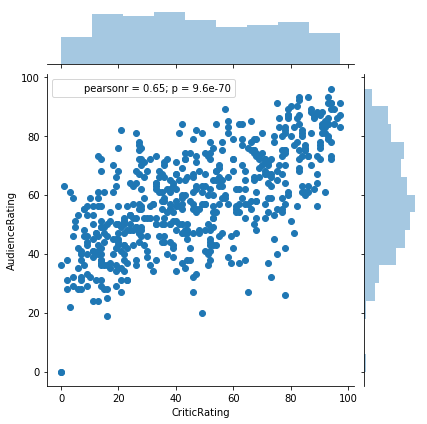

In [21]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

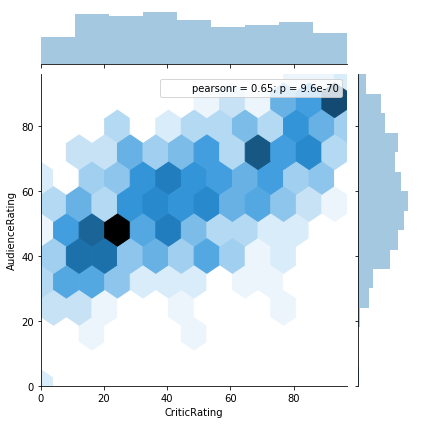

In [22]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

---

In [23]:
# Histograms

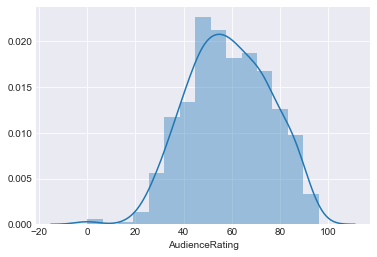

In [24]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRating, bins=15)

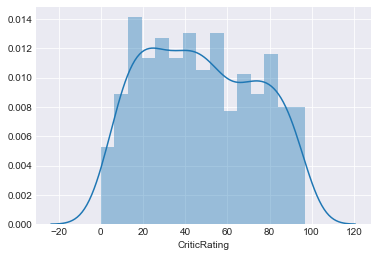

In [25]:
m2 = sns.distplot(movies.CriticRating, bins=15)

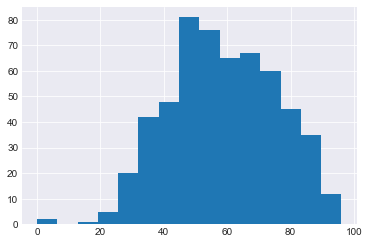

In [26]:
n1 = plt.hist(movies.AudienceRating, bins=15)

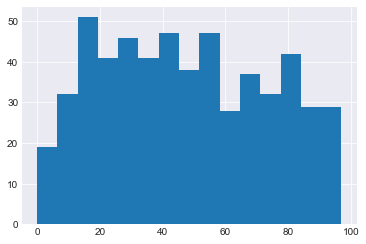

In [27]:
n2 = plt.hist(movies.CriticRating, bins=15)

---

In [28]:
# Stacked Histograms

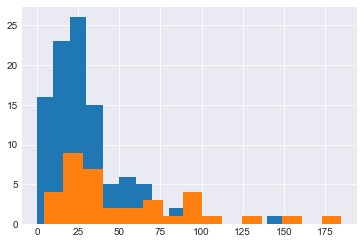

In [29]:
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

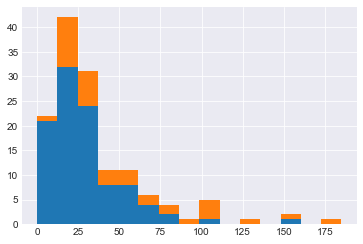

In [30]:
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions], \
          bins=15, stacked=True)
plt.show()

In [31]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


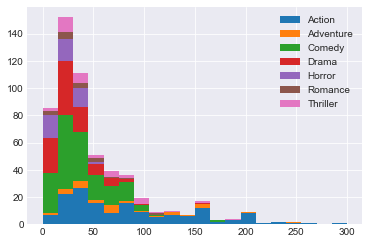

In [32]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins=20, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

---

In [33]:
# KDE Plot

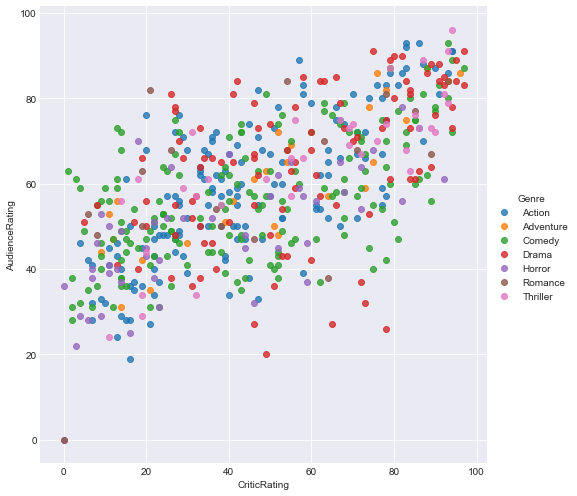

In [34]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=7, aspect=1)

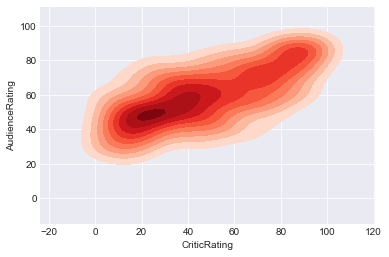

In [35]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
# TIP
#k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

---

In [36]:
# Working with Subplots()

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

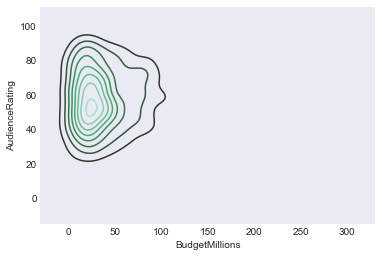

In [38]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

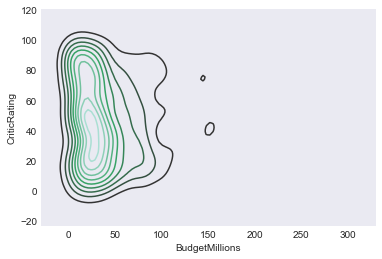

In [39]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

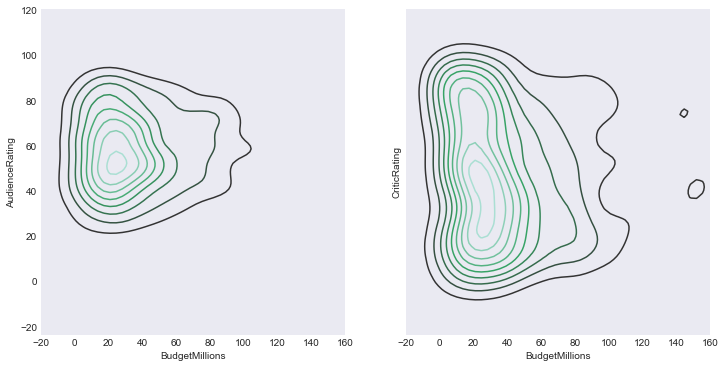

In [40]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True) # 1 row, 2 columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

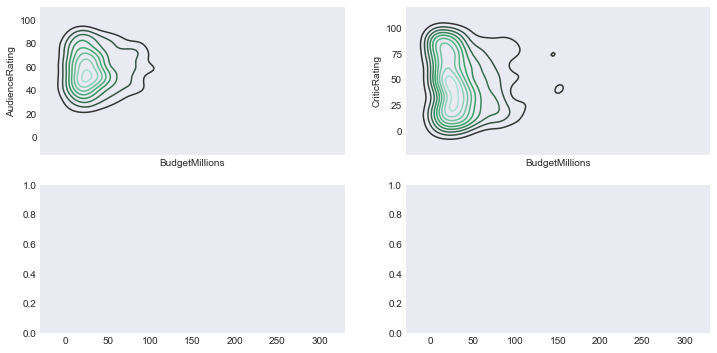

In [41]:
f, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True) # 2 rows, 2 columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

---

In [42]:
# ViolinPlots

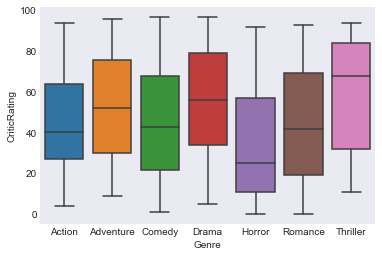

In [43]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

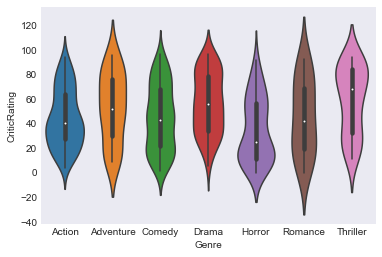

In [44]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

---

In [45]:
# Facet Grids

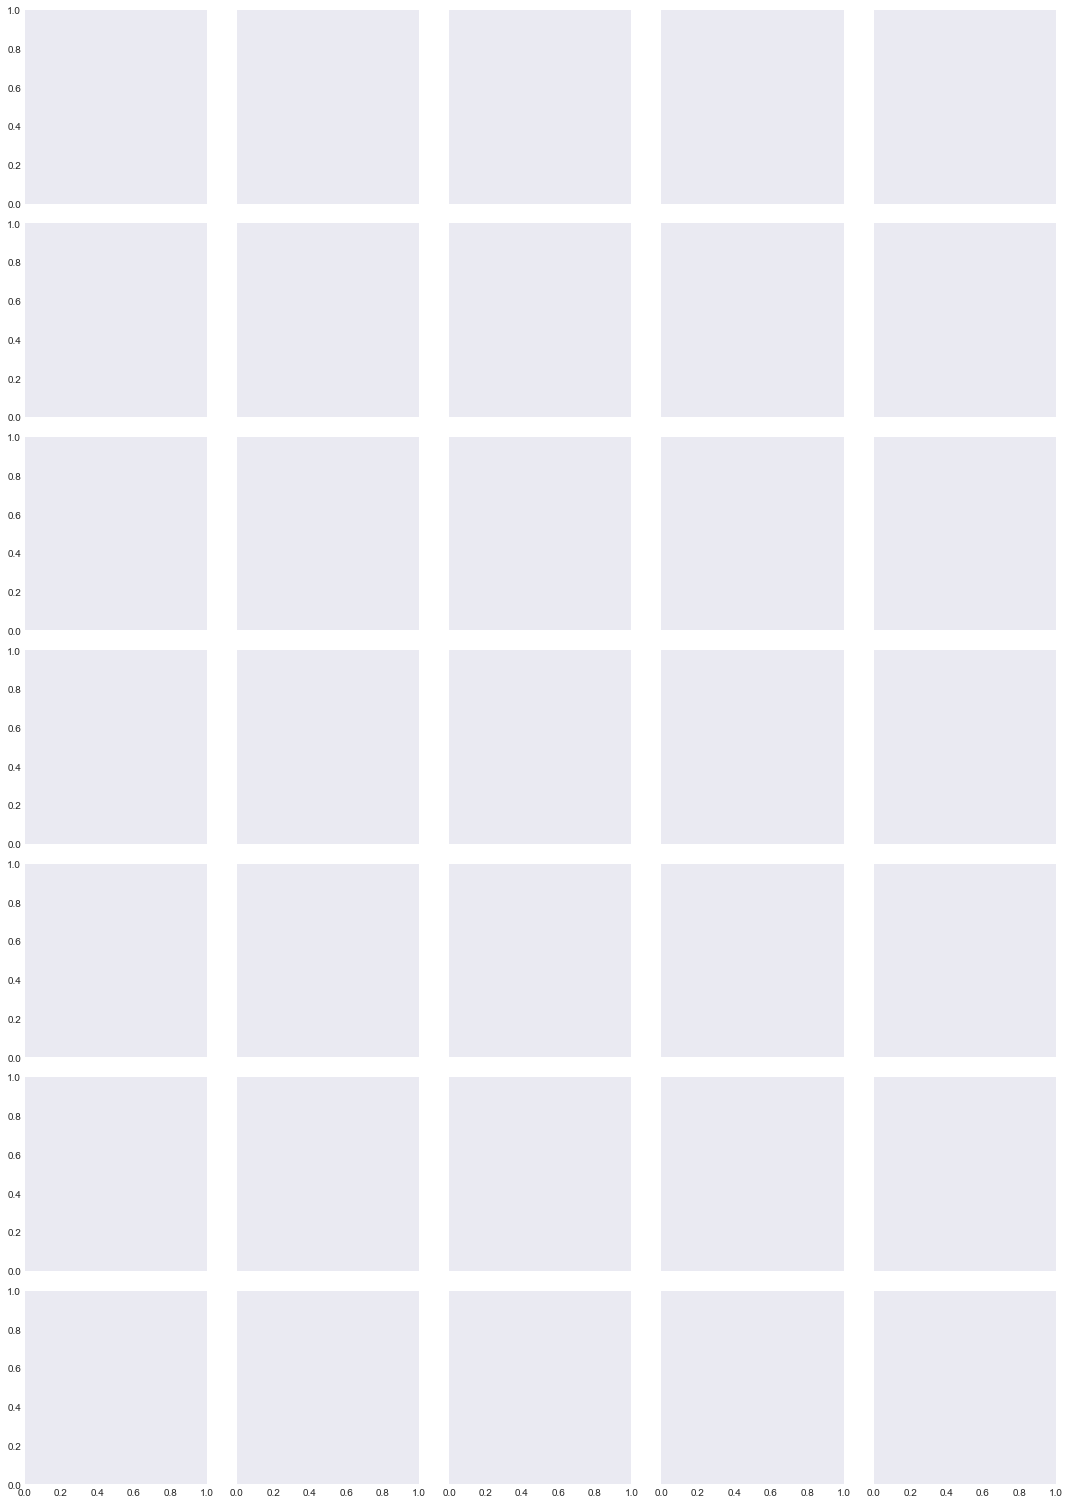

In [46]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

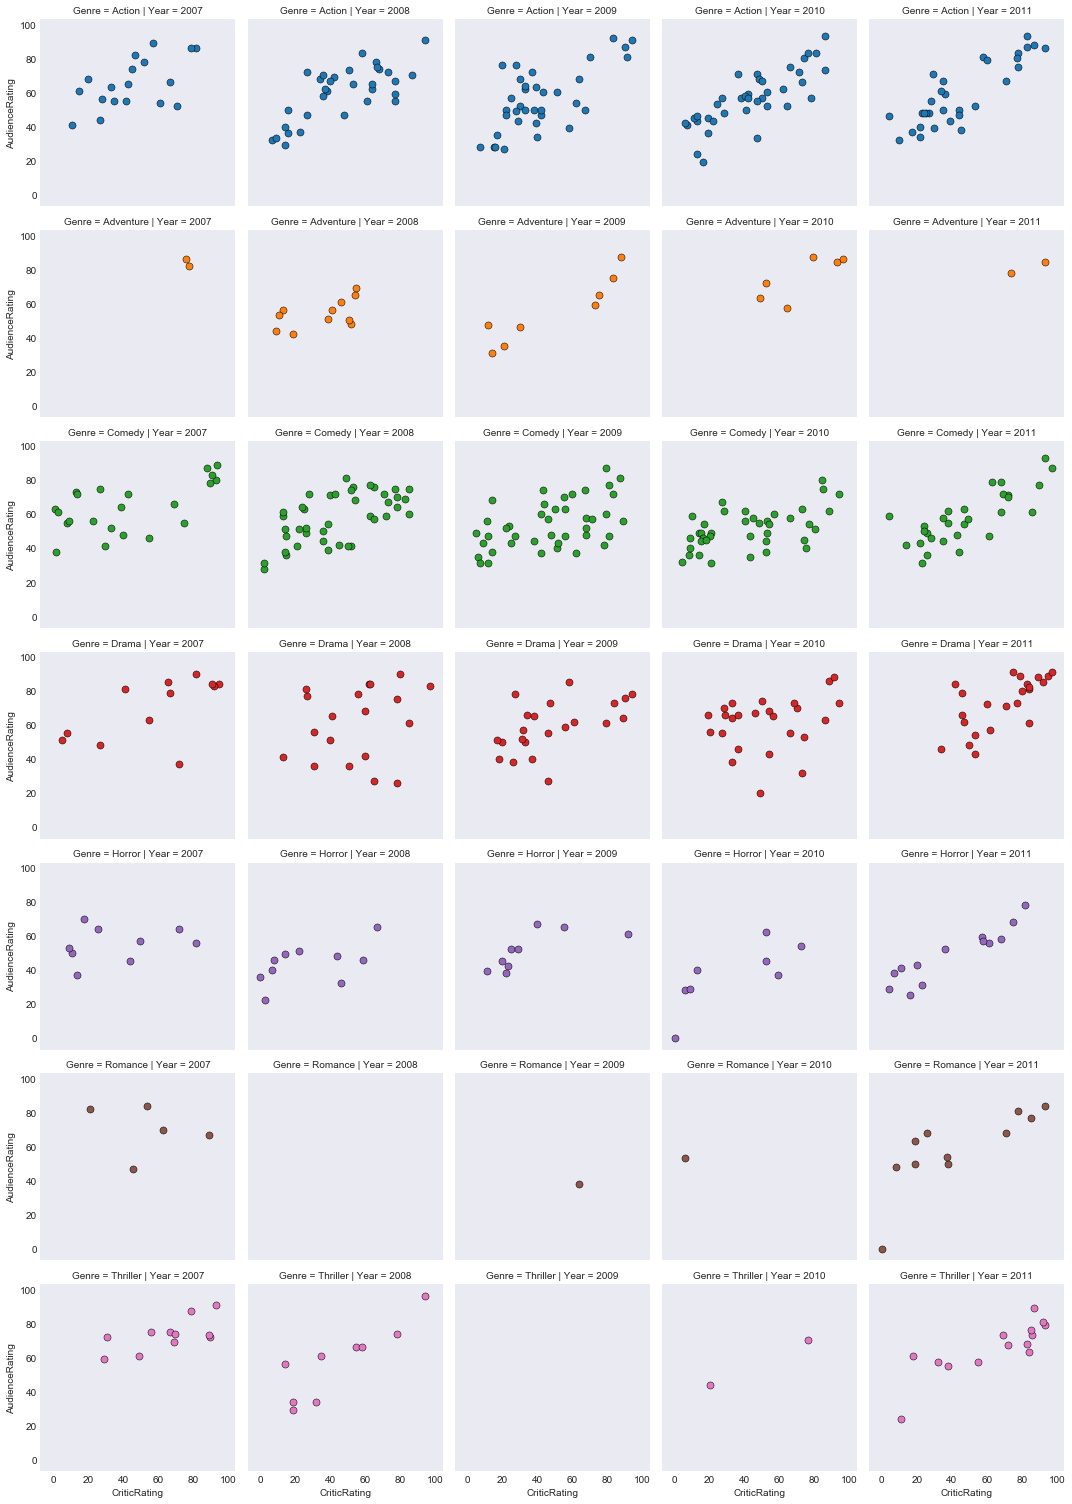

In [47]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [48]:
# Can populate with any type of chart. Ex: histograms

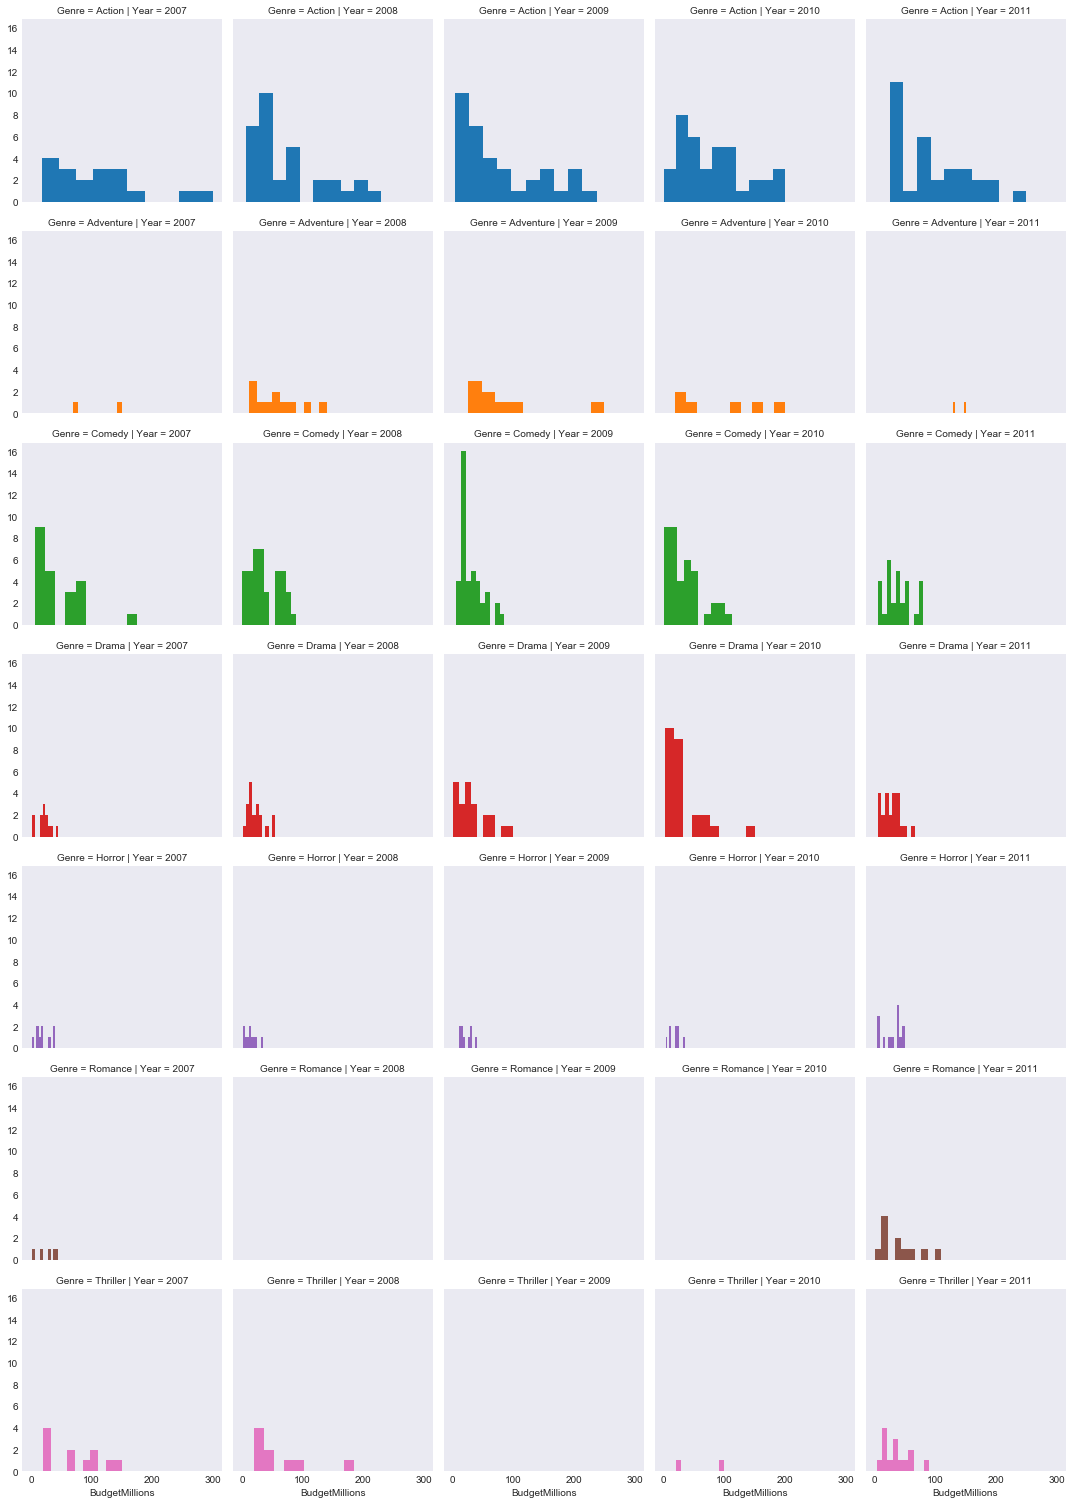

In [49]:
h = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
h = h.map(plt.hist, 'BudgetMillions')

---

In [50]:
# Coordinates and Diagonals

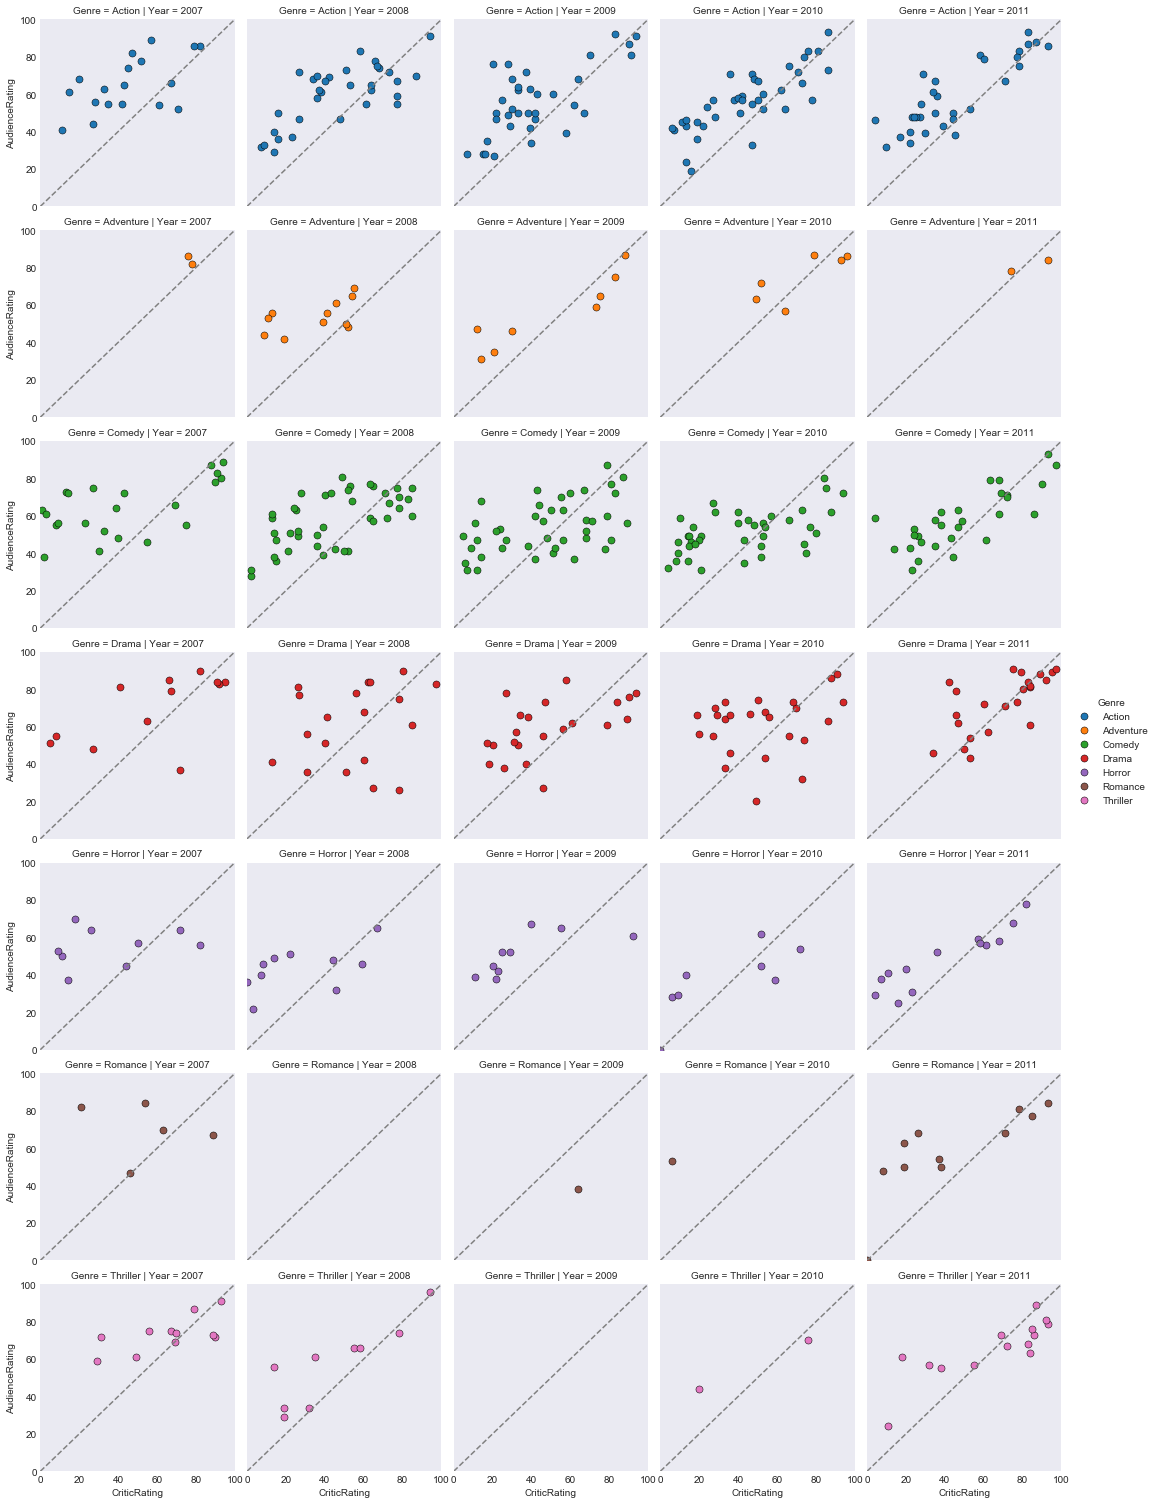

In [55]:
# Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()

---

In [56]:
# Building Dashboards

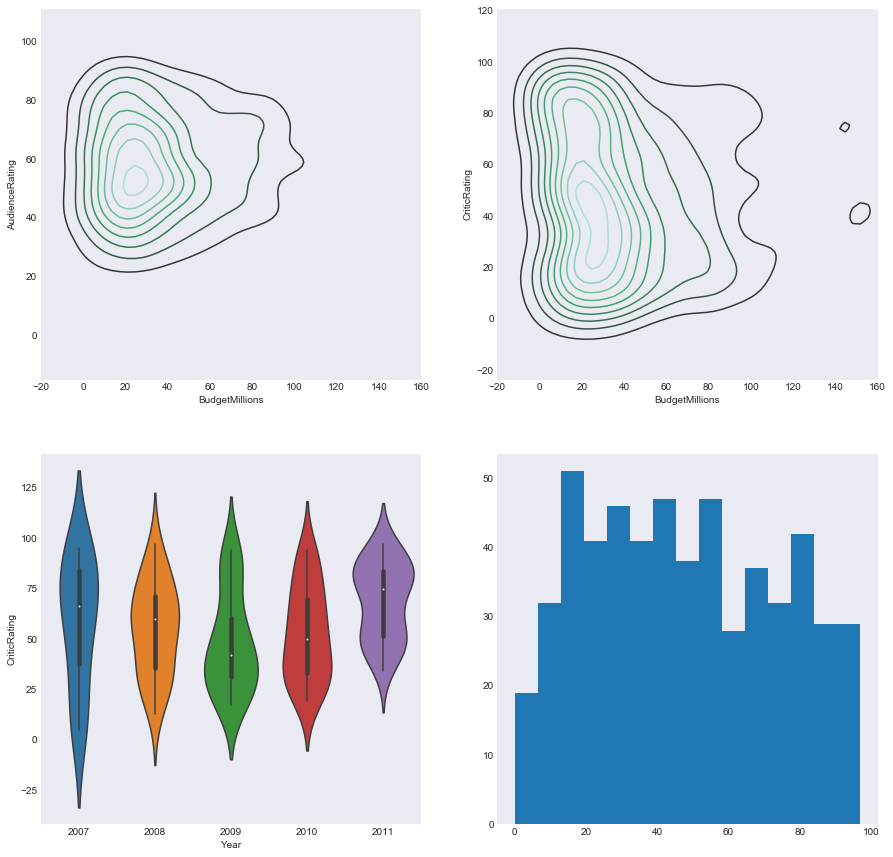

In [66]:
sns.set_style("dark")
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k3 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0])

#k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
# TIP
#k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1,1])

# Adding non-SNS plots

# WRONG WAY
#k4 = plt.hist(movies.CriticRating, bins=15, ax=axes[1,1])

# RIGHT WAY
axes[1,1].hist(movies.CriticRating, bins=15)

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()

---

In [67]:
# Styling Dashboards

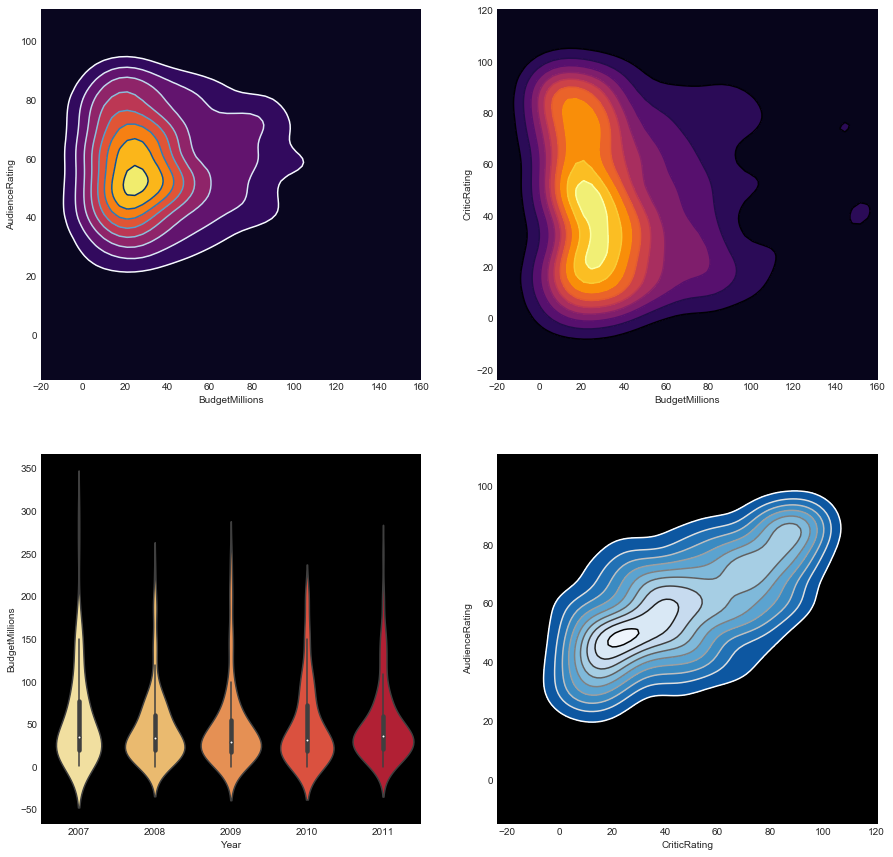

In [82]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2, 2, figsize=(15,15))
# Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,
                 shade=True, shade_lowest=True, cmap='inferno',
                 ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,
                 cmap='Blues', ax=axes[0,0])
# Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='inferno', ax=axes[0,1])

#Plot [1,0]
k3 = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette="YlOrRd")

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()

---

In [83]:
# Finishing Touches

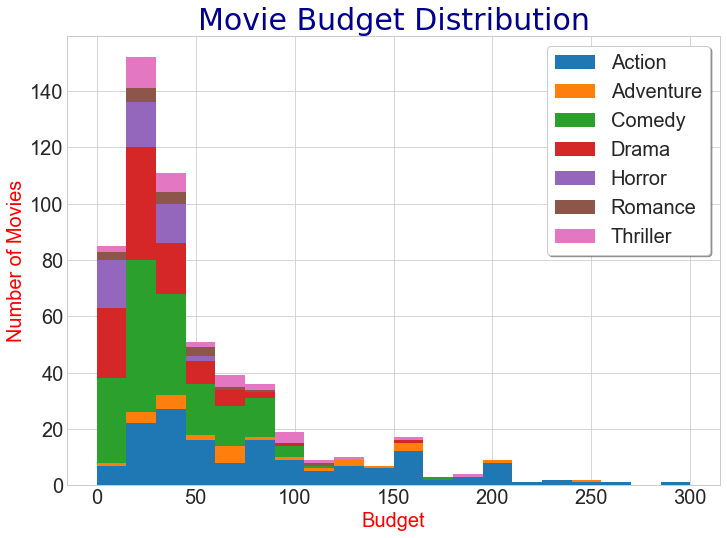

In [96]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # size of A4 paper
h = plt.hist(list1, bins=20, stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=30, color="DarkBlue", fontname="Console")
plt.ylabel("Number of Movies", fontsize=20, color="Red")
plt.xlabel("Budget", fontsize=20, color="Red")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size':20})
plt.show()